In [5]:
!pip install pandas openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


In [6]:
import pandas as pd

In [16]:
file = 'books.xlsx'
df = pd.read_excel(file)

df.head()

,Unnamed: 0,Titre,Categorie,Description,Prix,Note,Image
0,0,A Light in the Attic,Poetry,It's hard to imagine a world without A Light i...,Â£51.77,3,http://books.toscrape.com/catalogue/media/cach...
1,1,Tipping the Velvet,Historical Fiction,"""Erotic and absorbing...Written with starling ...",Â£53.74,1,http://books.toscrape.com/catalogue/media/cach...
2,2,Soumission,Fiction,"Dans une France assez proche de la nÃ´tre, un ...",Â£50.10,1,http://books.toscrape.com/catalogue/media/cach...
3,3,Sharp Objects,Mystery,"WICKED above her hipbone, GIRL across her hear...",Â£47.82,4,http://books.toscrape.com/catalogue/media/cach...
4,4,Sapiens: A Brief History of Humankind,History,From a renowned historian comes a groundbreaki...,Â£54.23,5,http://books.toscrape.com/catalogue/media/cach...


In [24]:
len(df)

1000

In [17]:
df.columns

Index(['Unnamed: 0', 'Titre', 'Categorie', 'Description', 'Prix', 'Note',
       'Image'],
      dtype='object')

In [19]:
df_cleaned = df.drop(columns=['Unnamed: 0', 'Description', 'Image'])

df_cleaned

,Titre,Categorie,Prix,Note
0,A Light in the Attic,Poetry,Â£51.77,3
1,Tipping the Velvet,Historical Fiction,Â£53.74,1
2,Soumission,Fiction,Â£50.10,1
3,Sharp Objects,Mystery,Â£47.82,4
4,Sapiens: A Brief History of Humankind,History,Â£54.23,5
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Classics,Â£55.53,1
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Sequential Art,Â£57.06,4
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,Â£16.97,5
998,1st to Die (Women's Murder Club #1),Mystery,Â£53.98,1


In [21]:
finally_file = 'books_cleaned.xlsx'
df_cleaned.to_excel(finally_file, index=False)
print(f"Le fichier nettoyé a bien été sauvegardé sous le nom: {finally_file}")

Le fichier nettoyé a bien été sauvegardé sous le nom: books_cleaned.xlsx


In [22]:
df = pd.read_excel(finally_file)
df.head()

,Titre,Categorie,Prix,Note
0,A Light in the Attic,Poetry,Â£51.77,3
1,Tipping the Velvet,Historical Fiction,Â£53.74,1
2,Soumission,Fiction,Â£50.10,1
3,Sharp Objects,Mystery,Â£47.82,4
4,Sapiens: A Brief History of Humankind,History,Â£54.23,5


In [23]:
len(df)

1000

In [27]:
df.isna().sum()

Titre        0
Categorie    0
Prix         0
Note         0
dtype: int64

In [28]:
df.dtypes

Titre        object
Categorie    object
Prix         object
Note          int64
dtype: object

In [29]:
df.Prix

0      Â£51.77
1      Â£53.74
2      Â£50.10
3      Â£47.82
4      Â£54.23
        ...   
995    Â£55.53
996    Â£57.06
997    Â£16.97
998    Â£53.98
999    Â£26.08
Name: Prix, Length: 1000, dtype: object

In [30]:
df['Prix'] = df['Prix'].str.replace('Â£', '').astype(float)
df['Prix'].head()

0    51.77
1    53.74
2    50.10
3    47.82
4    54.23
Name: Prix, dtype: float64

In [31]:
df.to_excel(finally_file, index=False)
print("Le fichier a été mis à jour avec les nouvelles valeurs de Prix.")

Le fichier a été mis à jour avec les nouvelles valeurs de Prix.


In [32]:
df.describe()

,Prix,Note
count,1000.00000,1000.000000
mean,35.07035,2.923000
std,14.44669,1.434967
min,10.00000,1.000000
25%,22.10750,2.000000
50%,35.98000,3.000000
75%,47.45750,4.000000
max,59.99000,5.000000


In [33]:
df['Categorie'].value_counts()

Categorie
Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Co

In [34]:
livres_plus_chers = df.sort_values(by="Prix", ascending=False)
livres_plus_chers.head()

,Titre,Categorie,Prix,Note
648,The Perfect Play (Play by Play #1),Romance,59.99,3
617,Last One Home (New Beginnings #1),Fiction,59.98,3
860,Civilization and Its Discontents,Psychology,59.95,2
560,The Barefoot Contessa Cookbook,Food and Drink,59.92,5
366,The Diary of a Young Girl,Nonfiction,59.90,3


In [35]:
meilleures_notes = df.sort_values(by="Note", ascending=False)
meilleures_notes.head()

,Titre,Categorie,Prix,Note
999,"1,000 Places to See Before You Die",Travel,26.08,5
560,The Barefoot Contessa Cookbook,Food and Drink,59.92,5
601,The Darkest Corners,Young Adult,11.33,5
598,The False Prince (The Ascendance Trilogy #1),Fantasy,56.00,5
592,The Mathews Men: Seven Brothers and the War Ag...,History,42.91,5


In [36]:
livres_5_etoiles = df[df['Note'] == 5]
livres_5_etoiles

,Titre,Categorie,Prix,Note
4,Sapiens: A Brief History of Humankind,History,54.23,5
12,Set Me Free,Young Adult,17.46,5
13,Scott Pilgrim's Precious Little Life (Scott Pi...,Sequential Art,52.29,5
14,Rip it Up and Start Again,Music,35.02,5
23,Chase Me (Paris Nights #2),Romance,25.27,5
...,...,...,...,...
985,Deep Under (Walker Security #1),Romance,47.09,5
989,Bright Lines,Fiction,39.07,5
993,"Bleach, Vol. 1: Strawberry and the Soul Reaper...",Sequential Art,34.65,5
997,A Spy's Devotion (The Regency Spies of London #1),Historical Fiction,16.97,5


In [37]:
len(livres_5_etoiles)

196

In [39]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 11.3 MB/s eta 0:00:0000:0100:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 10.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


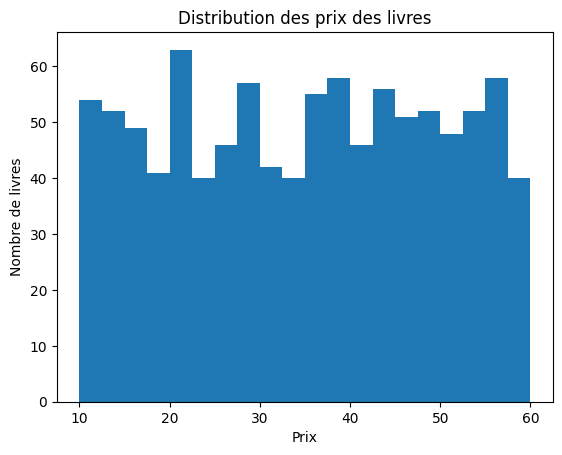

In [40]:
import matplotlib.pyplot as plt

plt.hist(df['Prix'], bins=20)
plt.title("Distribution des prix des livres")
plt.xlabel("Prix")
plt.ylabel("Nombre de livres")
plt.show()


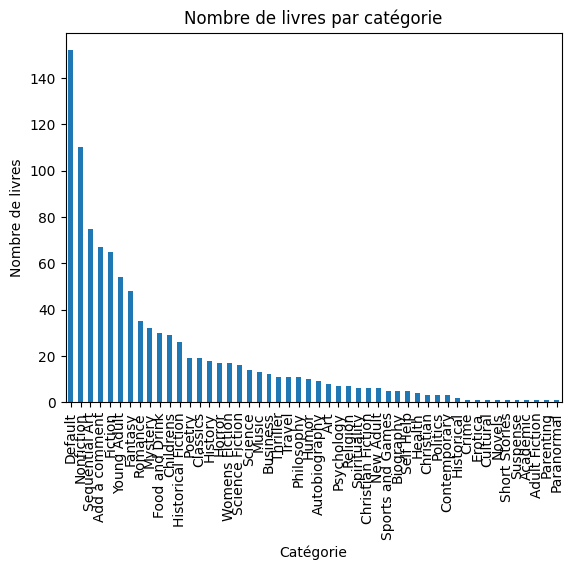

In [41]:
df['Categorie'].value_counts().plot(kind='bar')
plt.title("Nombre de livres par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre de livres")
plt.show()


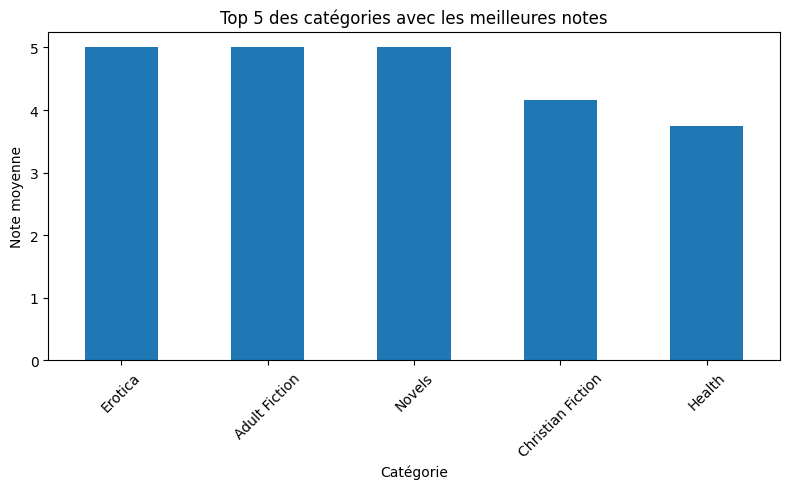

In [42]:
# Graphe 1 : Catégories ayant les meilleures notes
categorie_notes = df.groupby('Categorie')['Note'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
categorie_notes.plot(kind='bar')
plt.title("Top 5 des catégories avec les meilleures notes")
plt.xlabel("Catégorie")
plt.ylabel("Note moyenne")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

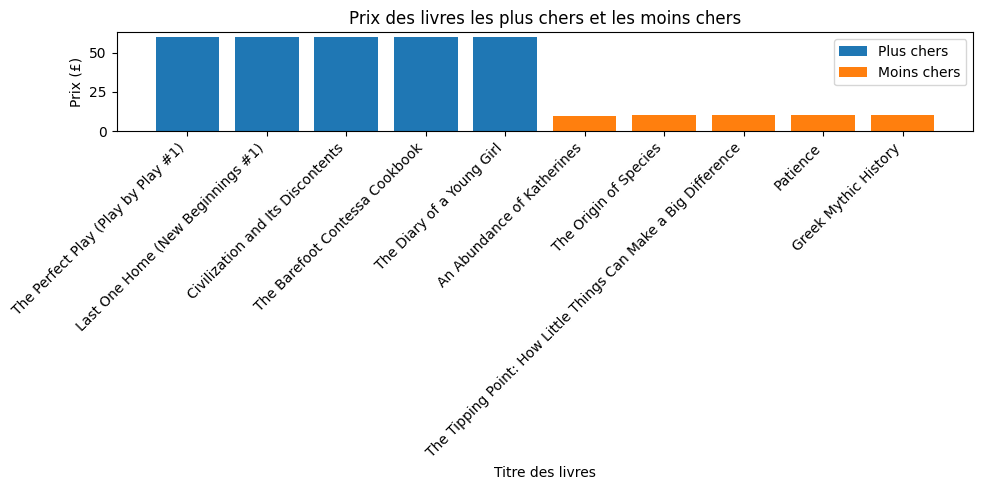

In [43]:
# Graphe 2 : Prix les plus chers et les moins chers
livres_plus_chers = df.nlargest(5, 'Prix')
livres_moins_chers = df.nsmallest(5, 'Prix')

plt.figure(figsize=(10, 5))
plt.bar(livres_plus_chers['Titre'], livres_plus_chers['Prix'], label="Plus chers")
plt.bar(livres_moins_chers['Titre'], livres_moins_chers['Prix'], label="Moins chers")
plt.title("Prix des livres les plus chers et les moins chers")
plt.xlabel("Titre des livres")
plt.ylabel("Prix (£)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
from collections import Counter
import re

In [45]:
# Extraire les titres
titres = df['Titre'].dropna().tolist()

# Nettoyer et tokeniser les titres
def nettoyer_titres(titre):
    titre = titre.lower()  # Convertir en minuscule
    titre = re.sub(r'[^\w\s]', '', titre)  # Supprimer la ponctuation
    mots = titre.split()  # Diviser en mots
    return mots

# Liste complète des mots dans les titres
mots_titres = []
for titre in titres:
    mots_titres.extend(nettoyer_titres(titre))

# Supprimer les mots courants (stop words)
stop_words = {'the', 'and', 'a', 'of', 'to', 'in', 'for', 'on', 'at', 'with', 'by', 'an', 'is', 'it'}
mots_filtrés = [mot for mot in mots_titres if mot not in stop_words]

# Compter la fréquence des mots
compteur_mots = Counter(mots_filtrés)

# Afficher les 10 mots les plus fréquents
print("Les 10 mots les plus fréquents dans les titres :")
for mot, freq in compteur_mots.most_common(10):
    print(f"{mot}: {freq}")

Les 10 mots les plus fréquents dans les titres :
1: 189
2: 56
3: 45
vol: 45
you: 40
life: 37
how: 32
love: 30
girl: 28
your: 26


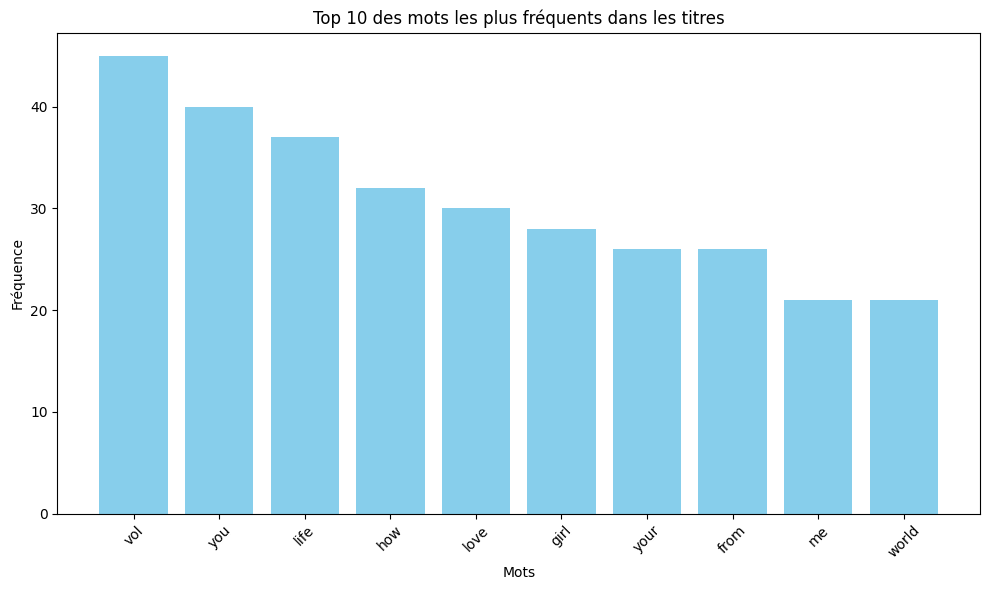

In [47]:
# Extraire les titres
titres = df['Titre'].dropna().tolist()

# Nettoyer et tokeniser les titres
def nettoyer_titres(titre):
    titre = titre.lower()  # Convertir en minuscule
    titre = re.sub(r'[^\w\s]', '', titre)  # Supprimer la ponctuation
    mots = titre.split()  # Diviser en mots
    return mots

# Liste complète des mots dans les titres
mots_titres = []
for titre in titres:
    mots_titres.extend(nettoyer_titres(titre))

# Supprimer les mots courants (stop words)
stop_words = {'the', 'and', 'a', 'of', 'to', 'in', 'for', 'on', 'at', 'with', 'by', 'an', 'is', 'it', '1', '2', '3'}
mots_filtrés = [mot for mot in mots_titres if mot not in stop_words]

# Compter la fréquence des mots
compteur_mots = Counter(mots_filtrés)

# Préparation des données pour le graphique
mots_les_plus_frequents = compteur_mots.most_common(10)

# Extraire les mots et les fréquences
mots, frequences = zip(*mots_les_plus_frequents)

# Créer un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(mots, frequences, color='skyblue')
plt.title("Top 10 des mots les plus fréquents dans les titres")
plt.xlabel("Mots")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.tight_layout()

# Afficher le graphique
plt.show()